t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


C:\Users\drake\AppData\Local\Temp/ipykernel_68776/3207692970.py:82: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


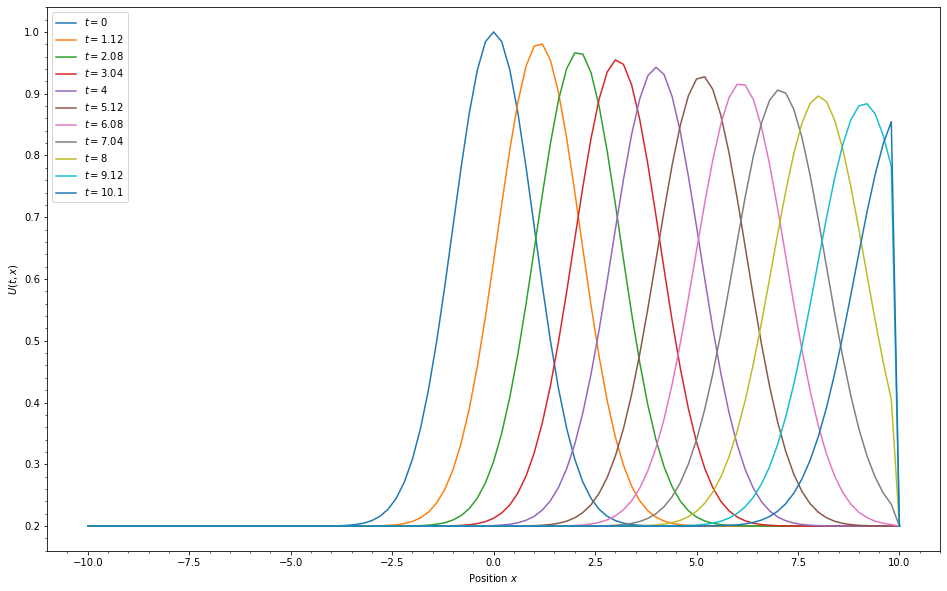

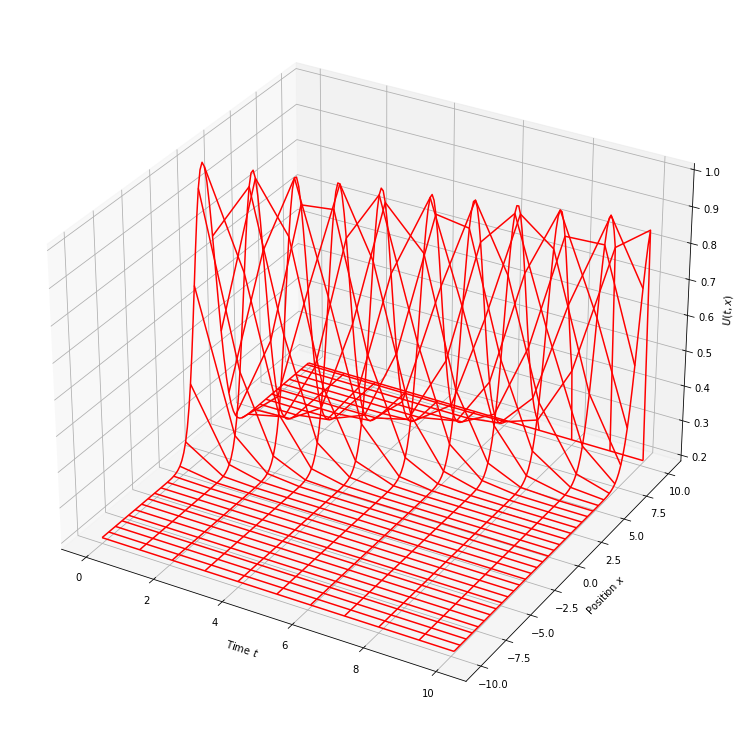

In [16]:
# Homework 7, Lec10
# Drake Joseph
# 3/27/2022

#1)Let's try the upwind method to solve this equation with an initial Gaussian profile.

#----------------------------------------------------------------------------------------------#
# This section is given in the homework problem.
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

#Add advection velocity to make UW equations work
#Note: "U before delU/delx is velocity at n and j."
vel = 1.0

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

#----------------------------------------------------------------------------------------------#
# This section comes from the UW method for plotting the funciton.
# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    
    # Find the state at the next time step.
    if vel > 0:
        for ix in range(1, Nx - 1):
            #U[ix] = Uj^(n+1)
            #Uold = Uj^n
           U[ix]=Uold[ix] - (vel*dt)*((Uold[ix] - Uold[ix-1])/dx) # Task: implement upwind method here. Finished
            
    else:
        for ix in range(1, Nx - 1):
           U[ix]= Uold[ix] - (vel*dt)*((Uold[ix + 1] - Uold[ix])/dx) # Task: implement upwind method here. Finished
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()
#----------------------------------------------------------------------------------------------#

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.0000000000000036
t =  6.000000000000004
t =  7.000000000000005
t =  8.000000000000005
t =  9.039999999999983
t =  10.039999999999962


C:\Users\drake\AppData\Local\Temp/ipykernel_68776/3322653760.py:75: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


Done.


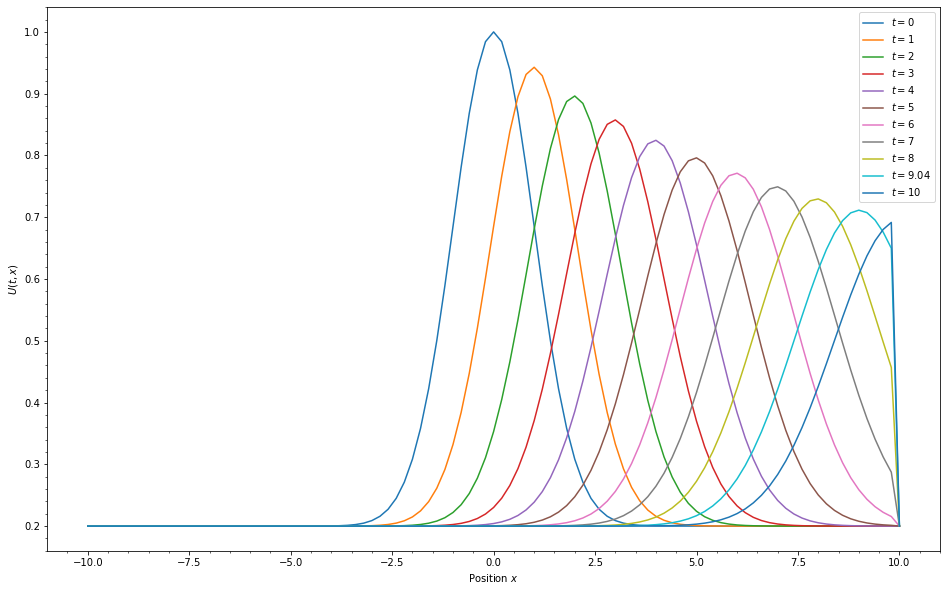

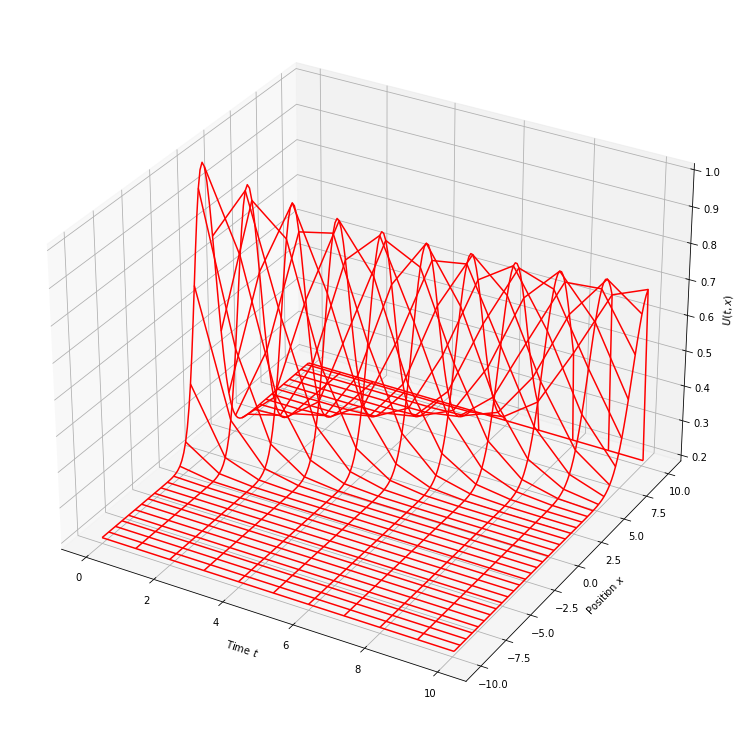

In [17]:
# 2)Please experiment with different grid sizes.
# To make a different grid size, we have to manipulate dt...
# Copy over all other code.
# Experiment 1: dt = 0.2*dx

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

#Add advection velocity to make UW equations work
#Note: "U before delU/delx is velocity at n and j."
vel = 1.0

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.2 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# This section comes from the UW method for plotting the funciton.
# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    
    # Find the state at the next time step.
    if vel > 0:
        for ix in range(1, Nx - 1):
            #U[ix] = Uj^(n+1)
            #Uold = Uj^n
           U[ix]=Uold[ix] - (vel*dt)*((Uold[ix] - Uold[ix-1])/dx) # Task: implement upwind method here. Finished
            
    else:
        for ix in range(1, Nx - 1):
           U[ix]= Uold[ix] - (vel*dt)*((Uold[ix + 1] - Uold[ix])/dx) # Task: implement upwind method here. Finished
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.2000000000000002
t =  2.0
t =  3.1999999999999997
t =  4.3999999999999995
t =  5.2
t =  6.000000000000001
t =  7.200000000000002
t =  8.000000000000002
t =  9.200000000000003
t =  10.000000000000004
Done.


C:\Users\drake\AppData\Local\Temp/ipykernel_68776/1522071364.py:76: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


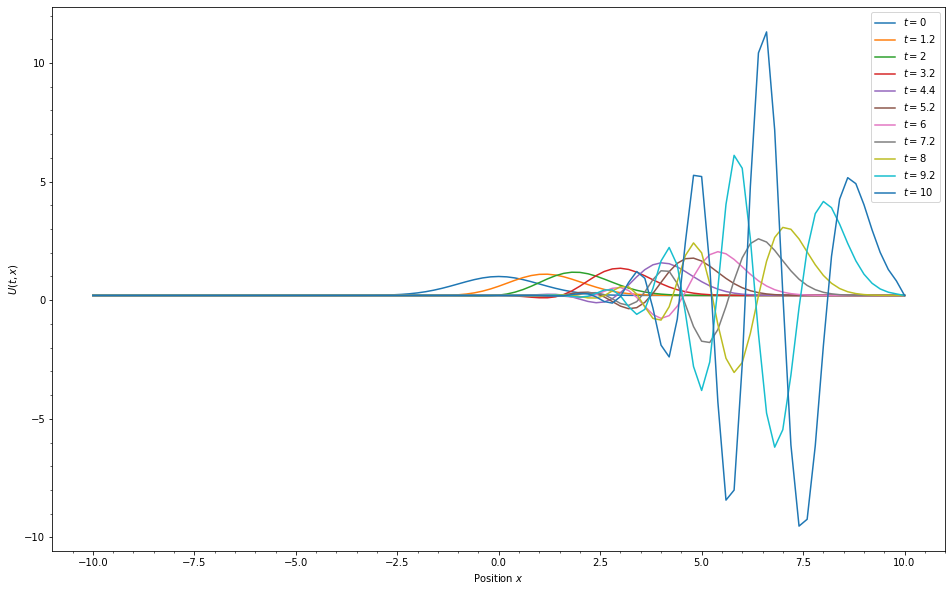

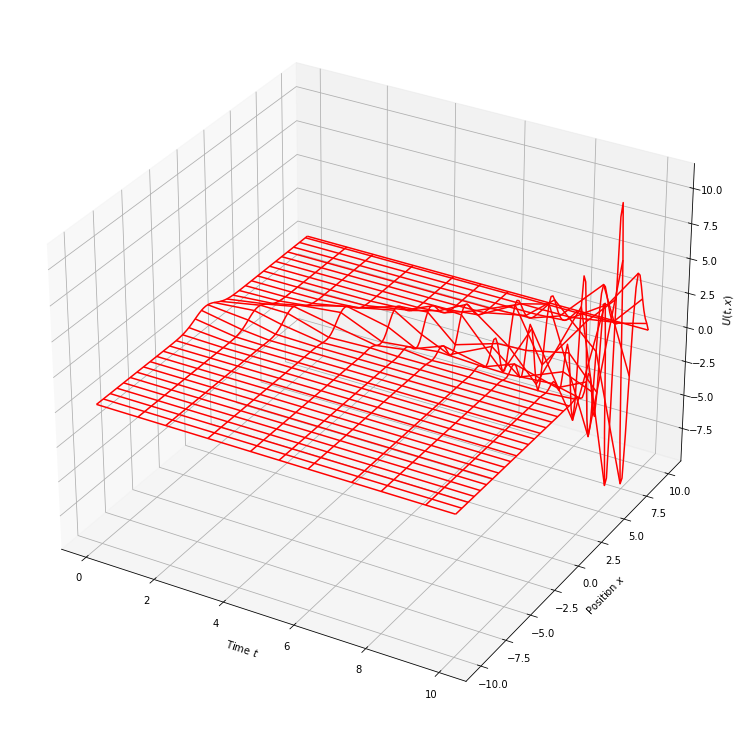

In [20]:
# 2)Please experiment with different grid sizes.
# To make a different grid size, we have to manipulate dt...
# Copy over all other code.
# Experiment 2: dt = 2*dx

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

#Add advection velocity to make UW equations work
#Note: "U before delU/delx is velocity at n and j."
vel = 1.0

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 2 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# This section comes from the UW method for plotting the funciton.
# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    
    # Find the state at the next time step.
    if vel > 0:
        for ix in range(1, Nx - 1):
            #U[ix] = Uj^(n+1)
            #Uold = Uj^n
           U[ix]=Uold[ix] - (vel*dt)*((Uold[ix] - Uold[ix-1])/dx) # Task: implement upwind method here. Finished
            
    else:
        for ix in range(1, Nx - 1):
           U[ix]= Uold[ix] - (vel*dt)*((Uold[ix + 1] - Uold[ix])/dx) # Task: implement upwind method here. Finished
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

In [ ]:
# 3)Now the solution develops a non-symmetric profile over time. Can you explain why?